# B to B Project

In [131]:
import pandas as pd

In [132]:
df=pd.read_csv('dataset')

In [133]:
df.head()

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
0,Andaman and Nicobar,South Andaman,Port Blair,Amaranthus,Amaranthus,04/03/2019,6000,8000,7000
1,Andaman and Nicobar,South Andaman,Port Blair,Banana - Green,Banana - Green,04/03/2019,4500,5500,5000
2,Andaman and Nicobar,South Andaman,Port Blair,Bhindi(Ladies Finger),Bhindi,04/03/2019,6000,8000,7000
3,Andaman and Nicobar,South Andaman,Port Blair,Bitter gourd,Other,04/03/2019,6000,8000,7000
4,Andaman and Nicobar,South Andaman,Port Blair,Black pepper,Other,04/03/2019,110000,130000,120000


## Feature Engineering

In [134]:
df.isna().sum()

state           0
district        0
market          0
commodity       0
variety         0
arrival_date    0
min_price       0
max_price       0
modal_price     0
dtype: int64

### insight: no null values in the dataset

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2238 entries, 0 to 2237
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   state         2238 non-null   object
 1   district      2238 non-null   object
 2   market        2238 non-null   object
 3   commodity     2238 non-null   object
 4   variety       2238 non-null   object
 5   arrival_date  2238 non-null   object
 6   min_price     2238 non-null   int64 
 7   max_price     2238 non-null   int64 
 8   modal_price   2238 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 157.5+ KB


### insight: there are three numerical and six categorical features in dataset

In [136]:
import seaborn as sns

### min_price feature

<Axes: >

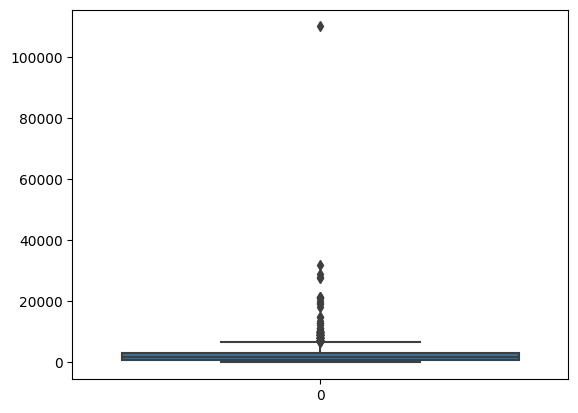

In [137]:
sns.boxplot(df['min_price'])

In [138]:
# there are lot of outliers in min_price feature
import numpy as np

In [139]:
# function to remove the outliers
def remove_Outliers(df,col):
    mini,q1,median,q3,maxi=np.quantile(df[col],[0,0.25,0.50,0.75,1.0])
    IQR=q3-q1
    lower_fence=q1-(1.5)*IQR
    upper_fence=q3+(1.5)*IQR
    df[col]=np.where(df[col]>upper_fence,upper_fence,np.where(df[col]<lower_fence,lower_fence,df[col]))

In [140]:
remove_Outliers(df,'min_price')

<Axes: >

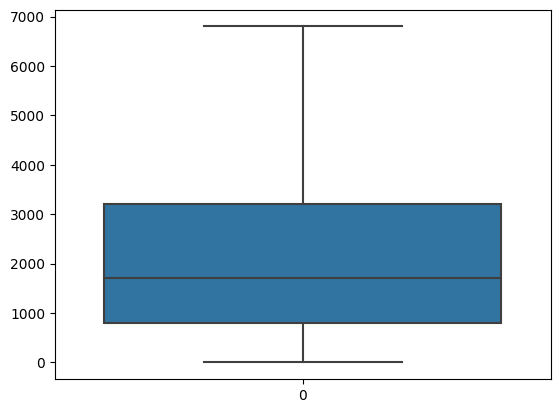

In [141]:
sns.boxplot(df['min_price'])

###  max_price feature

<Axes: >

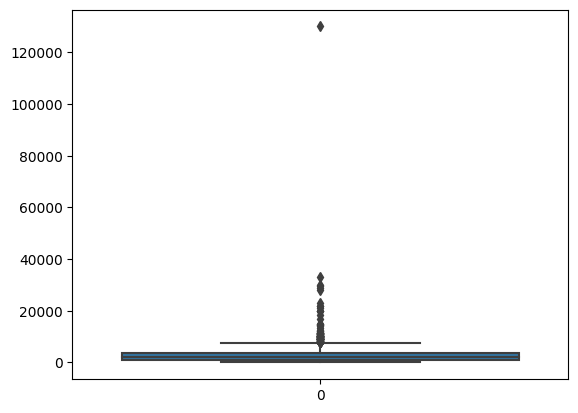

In [142]:
sns.boxplot(df['max_price'])

In [143]:
remove_Outliers(df,'max_price')

<Axes: >

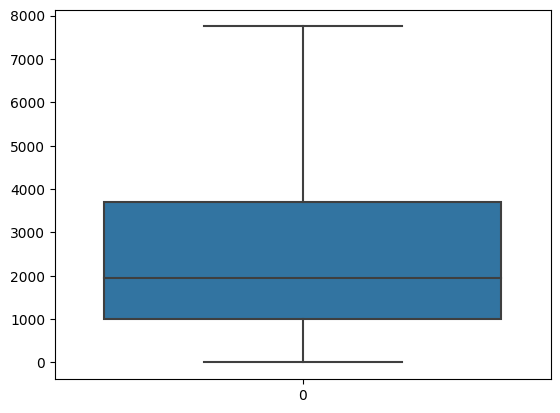

In [144]:
sns.boxplot(df['max_price'])

### modal_price feature

<Axes: >

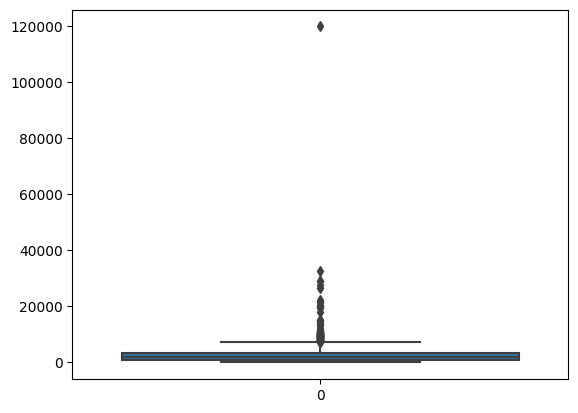

In [145]:
sns.boxplot(df['modal_price'])

In [146]:
remove_Outliers(df,'modal_price')

<Axes: >

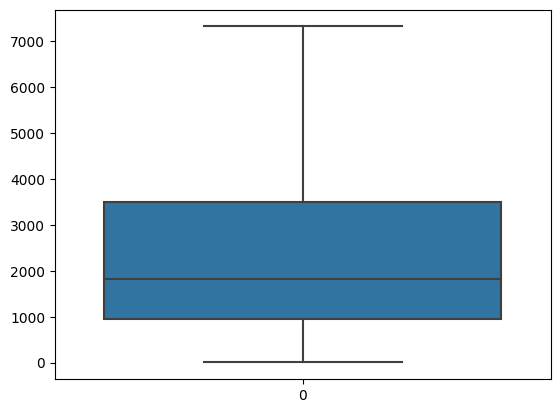

In [147]:
sns.boxplot(df['modal_price'])

In [160]:
df.describe()

,min_price,max_price,modal_price
count,2238.000000,2238.000000,2238.000000
mean,5952.914254,7717.888627,2466.191689
std,418.411514,404.817519,1946.289088
min,2236.503575,2616.767650,2.000000
25%,6000.000000,7750.000000,950.000000
50%,6000.000000,7750.000000,1831.500000
75%,6000.000000,7750.000000,3500.000000
max,6000.000000,7750.000000,7325.000000


* minimum value of min_price and max_price of product can not be 0 so we replace them with mean

In [149]:
df['min_price']=np.where(df[['min_price']]==0,np.mean(df['min_price']),df['min_price'])

In [150]:
df['max_price']=np.where(df[['max_price']]==0,np.mean(df['max_price']),df['max_price'])

In [151]:
df.describe()

,min_price,max_price,modal_price
count,2238.000000,2238.000000,2238.000000
mean,5952.914254,7717.888627,2466.191689
std,418.411514,404.817519,1946.289088
min,2236.503575,2616.767650,2.000000
25%,6000.000000,7750.000000,950.000000
50%,6000.000000,7750.000000,1831.500000
75%,6000.000000,7750.000000,3500.000000
max,6000.000000,7750.000000,7325.000000


## Exploratory Data Analysis

In [152]:
df.head()

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
0,Andaman and Nicobar,South Andaman,Port Blair,Amaranthus,Amaranthus,04/03/2019,6000.0,7750.0,7000.0
1,Andaman and Nicobar,South Andaman,Port Blair,Banana - Green,Banana - Green,04/03/2019,6000.0,7750.0,5000.0
2,Andaman and Nicobar,South Andaman,Port Blair,Bhindi(Ladies Finger),Bhindi,04/03/2019,6000.0,7750.0,7000.0
3,Andaman and Nicobar,South Andaman,Port Blair,Bitter gourd,Other,04/03/2019,6000.0,7750.0,7000.0
4,Andaman and Nicobar,South Andaman,Port Blair,Black pepper,Other,04/03/2019,6000.0,7750.0,7325.0


In [153]:
len(df['state'].unique())

26

In [154]:
len(df['district'].unique())

174

In [155]:
len(df['market'].unique())

326

In [156]:
len(df['commodity'].unique())

156

In [157]:
len(df['variety'].unique())

218

In [158]:
import matplotlib.pyplot as plt

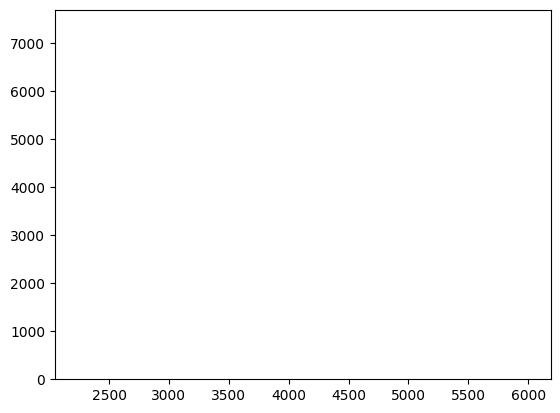

In [161]:
plt.bar(df['min_price'],df['modal_price'])
plt.show()

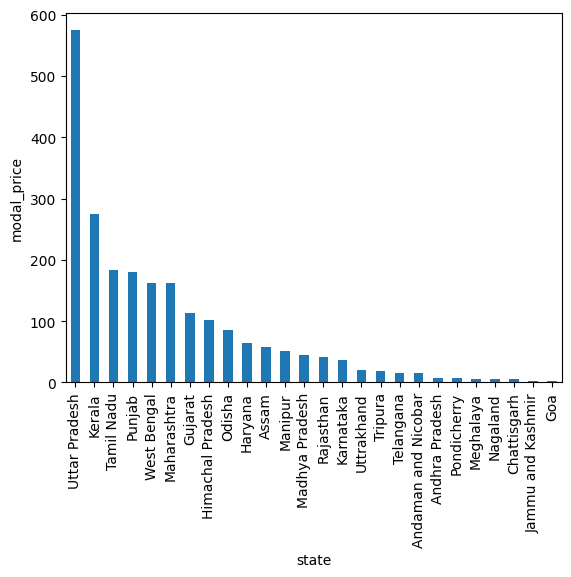

In [90]:
df.state.value_counts().plot(kind='bar')
plt.xlabel('state')
plt.ylabel('modal_price')
plt.show()

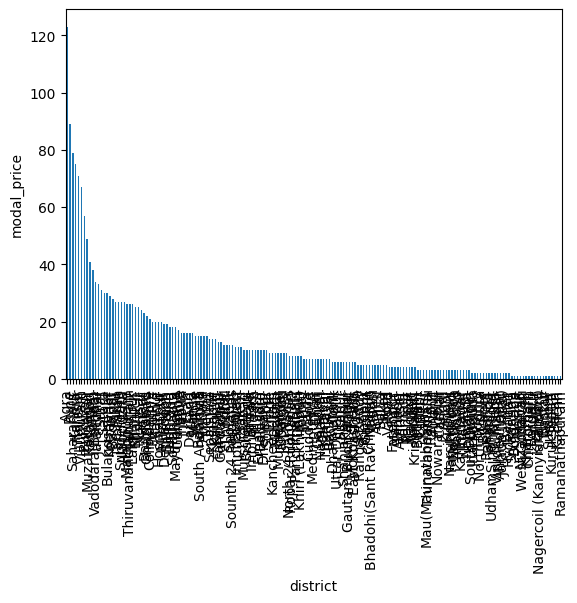

In [93]:
df.district.value_counts().plot(kind='bar')
plt.xlabel('district')
plt.ylabel('modal_price')
plt.show()

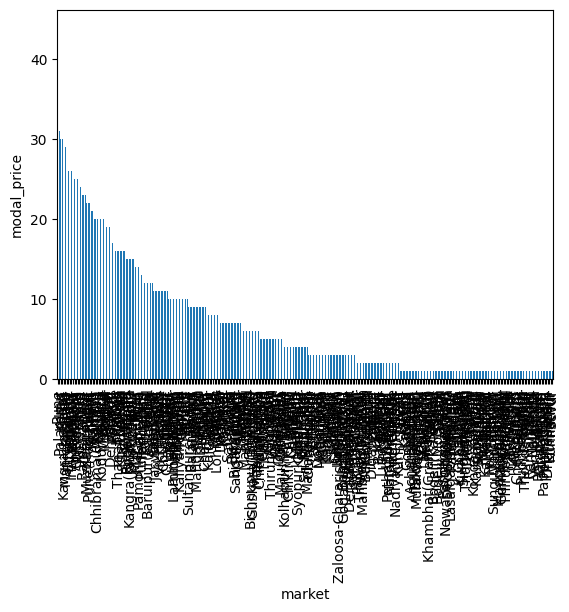

In [94]:
df.market.value_counts().plot(kind='bar')
plt.xlabel('market')
plt.ylabel('modal_price')
plt.show()

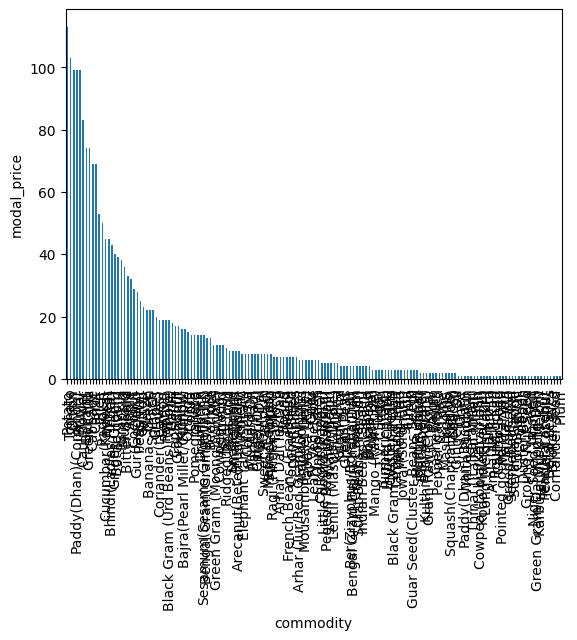

In [95]:
df.commodity.value_counts().plot(kind='bar')
plt.xlabel('commodity')
plt.ylabel('modal_price')
plt.show()

* from above graph we can say min_price feature is strongly positive correlated with modal_price

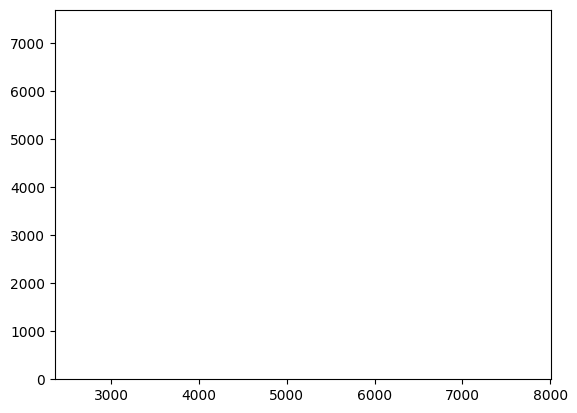

In [162]:
plt.bar(df['max_price'],df['modal_price'])
plt.show()

* from above graph we can say max_price feature is strongly positive correlated with modal_price

In [24]:
from scipy.stats import spearmanr

In [26]:
cor, p_value = spearmanr(df['state'], df['modal_price'])

print('Spearman correlation coefficient:', cor)
print('P-value:', p_value)

Spearman correlation coefficient: -0.192250367325613
P-value: 4.4939171243335153e-20


* insight: very less negative correlation between state and modal_price

In [27]:
cor, p_value = spearmanr(df['district'], df['modal_price'])

print('Spearman correlation coefficient:', cor)
print('P-value:', p_value)

Spearman correlation coefficient: 0.10050611330157062
P-value: 1.8969437388613066e-06


* insight: very less positive correlation between district and modal_price

In [28]:
cor, p_value = spearmanr(df['market'], df['modal_price'])

print('Spearman correlation coefficient:', cor)
print('P-value:', p_value)

Spearman correlation coefficient: -0.011797987180193837
P-value: 0.5769530104022169


* insight: very very less negative correlation between market and modal_price

In [29]:
cor, p_value = spearmanr(df['commodity'], df['modal_price'])

print('Spearman correlation coefficient:', cor)
print('P-value:', p_value)

Spearman correlation coefficient: -0.22107519954653193
P-value: 3.539463310090029e-26


insight: negative correlation between state and modal_price

In [30]:
cor, p_value = spearmanr(df['variety'], df['modal_price'])

print('Spearman correlation coefficient:', cor)
print('P-value:', p_value)

Spearman correlation coefficient: -0.022358680237705292
P-value: 0.29038628298606384


* insight: very very less negative correlation between variety and modal_price

In [32]:
cor, p_value = spearmanr(df['arrival_date'], df['modal_price'])

print('Spearman correlation coefficient:', cor)
print('P-value:', p_value)

Spearman correlation coefficient: nan
P-value: nan


C:\Users\91957\AppData\Roaming\Python\Python310\site-packages\scipy\stats\_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))



* we drop the features which are less than 0.20 and greater than -0.20 correlated with output feature

In [163]:
df.drop(df[['state','district','market','variety','arrival_date']],axis=1,inplace=True)

In [164]:
df.head()

,commodity,min_price,max_price,modal_price
0,Amaranthus,6000.0,7750.0,7000.0
1,Banana - Green,6000.0,7750.0,5000.0
2,Bhindi(Ladies Finger),6000.0,7750.0,7000.0
3,Bitter gourd,6000.0,7750.0,7000.0
4,Black pepper,6000.0,7750.0,7325.0
